In [1]:
#**************************************Viral Vakani***************************************************
#Import Libraries
import re
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statistics
import sys
import plotly.plotly as py
import plotly
import plotly.graph_objs as go
from collections import defaultdict

#Setting environment variables
#pd.options.display.max_columns = 50
warnings.filterwarnings("ignore")
sns.set_style("dark")
%matplotlib inline



In [2]:
#**************************************Viral Vakani***************************************************
#Reading Data
#Importing Data into Pandas DataFrame


df = pd.read_csv("raw_data/Traffic_Violations.csv")
df.count()

Date Of Stop               1018634
Time Of Stop               1018634
Agency                     1018634
SubAgency                  1018634
Description                1018625
Location                   1018632
Latitude                    933599
Longitude                   933599
Accident                   1018634
Belts                      1018634
Personal Injury            1018634
Property Damage            1018634
Fatal                      1018634
Commercial License         1018634
HAZMAT                     1018634
Commercial Vehicle         1018634
Alcohol                    1018634
Work Zone                  1018634
State                      1018575
VehicleType                1018634
Year                       1012208
Make                       1018586
Model                      1018465
Color                      1005043
Violation Type             1018634
Charge                     1018634
Article                     966569
Contributed To Accident    1018634
Race                

In [3]:
#**************************************Viral Vakani***************************************************
#Data Cleaning
#Drops the following columns. axis=1 denotes that these are columns not rows

df = df.drop(['Article','Agency','SubAgency', 'VehicleType','Make','Model','Color','Year', 'Geolocation'],axis=1)
df.head(5)

,Date Of Stop,Time Of Stop,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,State,Violation Type,Charge,Contributed To Accident,Race,Gender,Driver City,Driver State,DL State,Arrest Type
0,09/24/2013,17:11:00,DRIVING VEHICLE ON HIGHWAY WITH SUSPENDED REGI...,8804 FLOWER AVE,NaN,NaN,No,No,No,No,...,MD,Citation,13-401(h),No,BLACK,M,TAKOMA PARK,MD,MD,A - Marked Patrol
1,12/20/2012,00:41:00,DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,No,...,MD,Citation,21-902(b1),No,WHITE,M,DERWOOD,MD,MD,A - Marked Patrol
2,07/20/2012,23:12:00,FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,No,...,MD,Citation,21-707(a),No,ASIAN,F,GERMANTOWN,MD,MD,A - Marked Patrol
3,03/19/2012,16:10:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,No,...,VA,Citation,21-1124.2(d2),No,HISPANIC,M,ARLINGTON,VA,VA,A - Marked Patrol
4,12/01/2014,12:52:00,FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,...,MD,Citation,21-403(b),No,BLACK,F,UPPER MARLBORO,MD,MD,A - Marked Patrol


In [4]:
#**************************************Viral Vakani***************************************************
#Quick review of Data
#DataFrame Properties
#Clean Data of Nan/Null Values
#checking for missing values

print("Are there missing values? {}".format(df.isnull().any().any()))
#missing value control in features
X=df.isnull().sum()

#drop NaNs with 
df = df.dropna()
df.count()

Are there missing values? True


Date Of Stop               932635
Time Of Stop               932635
Description                932635
Location                   932635
Latitude                   932635
Longitude                  932635
Accident                   932635
Belts                      932635
Personal Injury            932635
Property Damage            932635
Fatal                      932635
Commercial License         932635
HAZMAT                     932635
Commercial Vehicle         932635
Alcohol                    932635
Work Zone                  932635
State                      932635
Violation Type             932635
Charge                     932635
Contributed To Accident    932635
Race                       932635
Gender                     932635
Driver City                932635
Driver State               932635
DL State                   932635
Arrest Type                932635
dtype: int64

In [5]:
#**************************************Viral Vakani***************************************************
import calendar
d = dict(enumerate(calendar.month_abbr))

#Create new columns year and month - take year and month form Date of Stop and store it into new columns

df['year'] = pd.DatetimeIndex(df['Date Of Stop']).year
df['month'] = pd.DatetimeIndex(df['Date Of Stop']).month
df['month'] = df['month'].map(d)

#Create a new column - Weekday that records the day of the week on which the incident occured
df['Weekday'] = pd.to_datetime(df['Date Of Stop']).dt.weekday_name

df['timestamp'] = pd.to_datetime(df['Time Of Stop'])
df['minutes'] = df['timestamp'].dt.hour * 60 + df['timestamp'].dt.minute


df.head(5)

,Date Of Stop,Time Of Stop,Description,Location,Latitude,Longitude,Accident,Belts,Personal Injury,Property Damage,...,Gender,Driver City,Driver State,DL State,Arrest Type,year,month,Weekday,timestamp,minutes
1,12/20/2012,00:41:00,DRIVING WHILE IMPAIRED BY ALCOHOL,NORFOLK AVE / ST ELMO AVE,38.983578,-77.093105,No,No,No,No,...,M,DERWOOD,MD,MD,A - Marked Patrol,2012,Dec,Thursday,2019-03-22 00:41:00,41
2,07/20/2012,23:12:00,FAILURE TO STOP AT STOP SIGN,WISTERIA DR @ WARING STATION RD,39.161810,-77.253581,No,No,No,No,...,F,GERMANTOWN,MD,MD,A - Marked Patrol,2012,Jul,Friday,2019-03-22 23:12:00,1392
3,03/19/2012,16:10:00,DRIVER USING HANDS TO USE HANDHELD TELEPHONE W...,CLARENDON RD @ ELM ST. N/,38.982731,-77.100755,No,No,No,No,...,M,ARLINGTON,VA,VA,A - Marked Patrol,2012,Mar,Monday,2019-03-22 16:10:00,970
4,12/01/2014,12:52:00,FAILURE STOP AND YIELD AT THRU HWY,CHRISTOPHER AVE/MONTGOMERY VILLAGE AVE,39.162888,-77.229088,No,No,No,Yes,...,F,UPPER MARLBORO,MD,MD,A - Marked Patrol,2014,Dec,Monday,2019-03-22 12:52:00,772
5,06/09/2012,21:19:00,OCCUPANT UNDER 16 NOT RESTRAINED BY SEATBELT,2068 HARLEQUIN TERRACE,39.069143,-76.969678,No,No,No,No,...,F,SILVER SPRING,MD,MD,A - Marked Patrol,2012,Jun,Saturday,2019-03-22 21:19:00,1279


In [6]:
#**************************************Viral Vakani***************************************************
minutes = df.minutes.sort_values()

In [7]:
#**************************************Viral Vakani***************************************************
#Total minutes in a day
total_minutes = 24 * 60

ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / df.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]
hcdf = np.arange(total_minutes) * (1 / total_minutes)

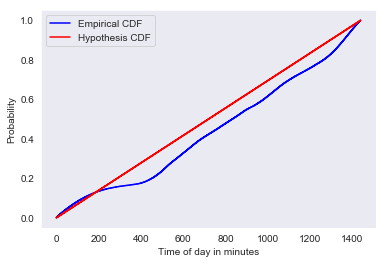

In [9]:
#**************************************Viral Vakani***************************************************
plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.savefig("ECDF_HCDF_Analysis1.png")

In [10]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.114348842407685

In [11]:
#**************************************Viral Vakani***************************************************
# Since max diff between Empirical CDF and CDF of hypothesis is less that 0.15, we do not reject the null hypothesis
# K Test for Male
male = df[df.Gender == 'M']
male.shape

(622196, 31)

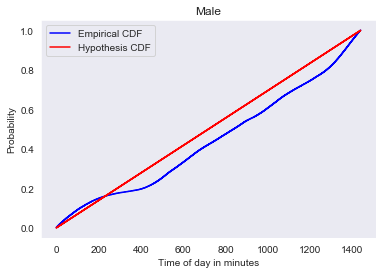

In [12]:
#**************************************Viral Vakani***************************************************
minutes = np.sort(male.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / male.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Male")
plt.savefig("ECDF_HCDF_Analysis_Male.png")

In [22]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
#**************************************Viral Vakani***************************************************max_diff

0.09570229656106921

In [14]:
#Since max diff between Empirical CDF and CDF of hypothesis is greater than 0.09, we can reject the null hypothesis, however it is not less than 0.05 
#K Test for Female
female = df[df.Gender == 'F']
female.shape

(309389, 31)

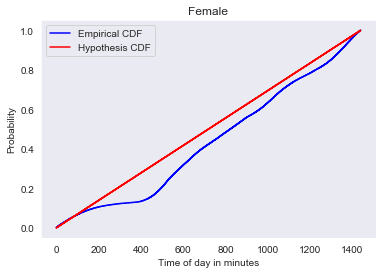

In [15]:
#**************************************Viral Vakani***************************************************
minutes = np.sort(female.minutes)
ecdf = np.zeros(total_minutes)
for minute in minutes:
  ecdf[minute] += 1 / female.shape[0]
for i in range(1, total_minutes):
  ecdf[i] += ecdf[i-1]

hcdf = np.arange(total_minutes) * (1 / total_minutes)


plt.step(np.arange(total_minutes), ecdf, 'b', label='Empirical CDF')
plt.step(np.arange(total_minutes), hcdf, 'r', label='Hypothesis CDF')
plt.legend()
plt.xlabel('Time of day in minutes')
plt.ylabel('Probability')
plt.title("Female")
plt.savefig("ECDF_HCDF_Analysis_Female.png")

In [16]:
#**************************************Viral Vakani***************************************************
max_diff = np.max(np.abs(ecdf - hcdf))
max_diff

0.15384945767661742

In [ ]:
#Since max diff between Empirical CDF and CDF of hypothesis is greater than 0.15, we reject the null hypothesis

In [17]:
#**************************************Viral Vakani***************************************************
#Gender Analysis
temp=df.pivot_table(values='Violation Type', index=df['year'], columns='Gender', aggfunc=np.size)
temp

Gender,F,M,U
year,,,
2012,46436,93360,285
2013,54145,108777,202
2014,69198,133285,214
2015,74076,148698,224
2016,65534,138076,125


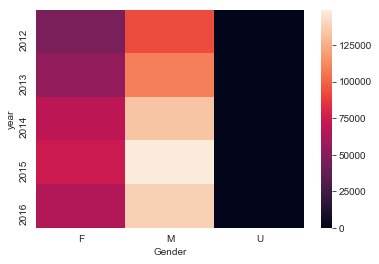

In [18]:
#**************************************Viral Vakani***************************************************
sns.heatmap(temp)
plt.savefig("GenderAnalysis_Heatmap.png")
plt.show()

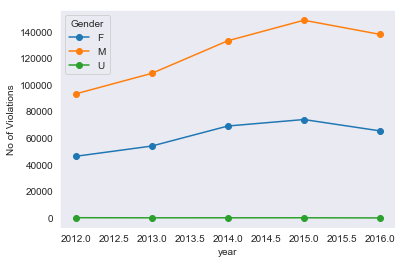

In [19]:
#**************************************Viral Vakani***************************************************
#Lets get a clear picture on Gender Analysis
df.groupby(['year', 'Gender'])['Violation Type'].count().unstack().plot(marker='o')
#plt.xticks('White', 'Black')
plt.ylabel('No of Violations')
plt.savefig("Gender_by_Year.png")

plt.show()

In [20]:
#**************************************Viral Vakani***************************************************
#Race Analysis
temp2=df.pivot_table(values='Violation Type', index=df['year'], columns='Race', aggfunc=np.size)
temp2


Race,ASIAN,BLACK,HISPANIC,NATIVE AMERICAN,OTHER,WHITE
year,,,,,,
2012,8065,42721,24804,29,7141,57321
2013,9640,51864,31172,333,7812,62303
2014,12328,60916,40599,866,10747,77241
2015,13149,69487,48213,662,11723,79764
2016,11810,66359,47177,456,11453,66480


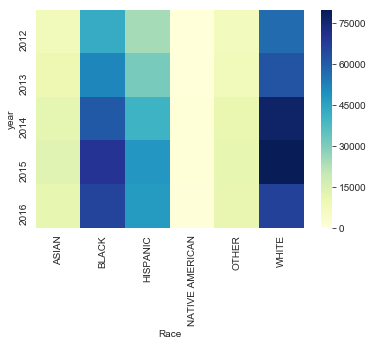

In [21]:
#**************************************Viral Vakani***************************************************
sns.heatmap(temp2, cmap="YlGnBu")
plt.savefig("RaceAnalysis_Heatmap.png")
plt.show()

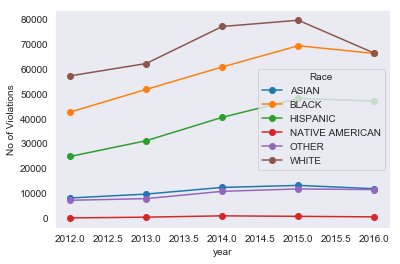

In [22]:
#**************************************Viral Vakani***************************************************
#Lets get a clear picture on Gender Analysis
df.groupby(['year', 'Race'])['Violation Type'].count().unstack().plot(marker='o')
plt.ylabel('No of Violations')
plt.savefig("Race_by_Year.png")
plt.show()